# Sentiment Prediction and Restaurant Recommendation using Yelp reviews

## Project Goals: 
* Sentement analysis: predict perfect sentiment (rating 5 vs. 1-4) using review texts and logistic regression
* Recommendation: recommend restaurants based on review ratings and texts using latent-factor collaborative filtering (matrix factorization)

# PART 0. DATA PRE-PROCESSING

In [64]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500,'display.max_rows', 1000)

%matplotlib inline

In [65]:
import json
import pandas as pd

In [68]:
# store the full data in a list
file_business, file_checkin, file_review, file_tip, file_user = [
    'dataset\\business.json',
    'dataset\\checkin.json',
    'dataset\\review.json',
    'dataset\\tip.json',
    'dataset\\user.json']

## Process user data

In [5]:
with open(file_user, 'rb') as f:      
    df_user = pd.DataFrame(json.loads(line) for line in f)

In [11]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1637138 entries, 0 to 1637137
Data columns (total 22 columns):
average_stars         1637138 non-null float64
compliment_cool       1637138 non-null int64
compliment_cute       1637138 non-null int64
compliment_funny      1637138 non-null int64
compliment_hot        1637138 non-null int64
compliment_list       1637138 non-null int64
compliment_more       1637138 non-null int64
compliment_note       1637138 non-null int64
compliment_photos     1637138 non-null int64
compliment_plain      1637138 non-null int64
compliment_profile    1637138 non-null int64
compliment_writer     1637138 non-null int64
cool                  1637138 non-null int64
elite                 1637138 non-null object
fans                  1637138 non-null int64
friends               1637138 non-null object
funny                 1637138 non-null int64
name                  1637138 non-null object
review_count          1637138 non-null int64
useful                16371

In [15]:
df_user.head(2)

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,4.03,1,0,1,2,0,0,1,0,1,...,25,"2015,2016,2017",5,"c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",17,Rashmi,95,84,l6BmjZMeQD3rDxWUbiAiow,2013-10-08 23:11:33
1,3.63,1,0,1,1,0,0,0,0,0,...,16,,4,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",22,Jenna,33,48,4XChL029mKr5hydo79Ljxg,2013-02-21 22:29:06


* User data did not give much useful info for this project's purpose. Not digging more.

## Process business data

### Load business data

In [3]:
# open and load JSON file
f = open(file_business)
first_line = f.readline()
first_line_json = json.loads(first_line)

print(first_line_json)

{'business_id': '1SWheh84yJXfytovILXOAQ', 'name': 'Arizona Biltmore Golf Club', 'address': '2818 E Camino Acequia Drive', 'city': 'Phoenix', 'state': 'AZ', 'postal_code': '85016', 'latitude': 33.5221425, 'longitude': -112.0184807, 'stars': 3.0, 'review_count': 5, 'is_open': 0, 'attributes': {'GoodForKids': 'False'}, 'categories': 'Golf, Active Life', 'hours': None}


In [69]:
# Load JSON file into Pandas DF
# note: 'need 'rb' to read binary data 
with open(file_business, 'rb') as f:      
    df_business = pd.DataFrame(json.loads(line) for line in f)

In [70]:
df_business.head(3)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC


In [6]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192609 entries, 0 to 192608
Data columns (total 14 columns):
address         192609 non-null object
attributes      163773 non-null object
business_id     192609 non-null object
categories      192127 non-null object
city            192609 non-null object
hours           147779 non-null object
is_open         192609 non-null int64
latitude        192609 non-null float64
longitude       192609 non-null float64
name            192609 non-null object
postal_code     192609 non-null object
review_count    192609 non-null int64
stars           192609 non-null float64
state           192609 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 20.6+ MB


### EDA
Las Vegas has over 29,000 (15%) restaurants. This project will only focus on Las Vegas restaurants.

In [8]:
print(df_business.city.value_counts()[:5])

Las Vegas     29370
Toronto       18906
Phoenix       18766
Charlotte      9509
Scottsdale     8837
Name: city, dtype: int64


In [10]:
(df_business.city.value_counts()/len(df_business))[:5]

Las Vegas     0.152485
Toronto       0.098157
Phoenix       0.097431
Charlotte     0.049369
Scottsdale    0.045881
Name: city, dtype: float64

### Focused on restaurants in Las Vegas

In [23]:
# Create filtered DataFrame, and name it df_filtered
df_lvres = df_business[(df_business['city'] == "Las Vegas") & (df_business["categories"].str.contains("Restaurants"))]

print(df_lvres.shape)
df_lvres.head(3)

(6450, 14)


,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
17,"1775 E Tropicana Ave, Ste 29","{'OutdoorSeating': 'False', 'BusinessAcceptsCr...",PZ-LZzSlhSe9utkQYU8pFg,"Restaurants, Italian",Las Vegas,None,0,36.100016,-115.128529,Carluccio's Tivoli Gardens,89119,40,4.0,NV
25,6055 E Lake Mead Blvd,"{'BikeParking': 'True', 'BusinessParking': '{'...",tstimHoMcYbkSC4eBA1wEg,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...",Las Vegas,"{'Monday': '11:0-21:0', 'Tuesday': '10:0-21:0'...",1,36.195615,-115.040529,Maria's Mexican Restaurant & Bakery,89156,184,4.5,NV
75,6125 Spring Mountain Rd,"{'RestaurantsPriceRange2': '1', 'Ambience': '{...",kANF0dbeoW34s2vwh6Umfw,"Fast Food, Food, Restaurants, Ice Cream & Froz...",Las Vegas,None,0,36.125031,-115.225620,Dairy Queen,89146,33,2.0,NV


* LV has 6450 restaurants

#### Only keep 4 relevant variables in business data.

In [24]:
df_lvres2 = df_lvrestaurants[['business_id', 'name', 'categories', 'stars']].copy()
df_lvres2.head(2)

,business_id,name,categories,stars
17,PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens,"Restaurants, Italian",4.0
25,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...",4.5


#### Rename "stars" to "avg_stars" to avoid conflicts with review ratings data set

In [26]:
df_lvres2 = df_lvres2.rename(columns={"stars":"avg_stars"})

In [27]:
# Inspect your DataFrame
df_lvres2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6450 entries, 17 to 192562
Data columns (total 4 columns):
business_id    6450 non-null object
name           6450 non-null object
categories     6450 non-null object
avg_stars      6450 non-null float64
dtypes: float64(1), object(3)
memory usage: 252.0+ KB


In [30]:
df_lvres2.to_pickle("df_lvres2.pkl")

In [31]:
df_lvres2 = pd.read_pickle("df_lvres2.pkl")

## Process review data

### Load review data

In [32]:
with open(file_review, 'rb') as f:
    df_review = pd.DataFrame(json.loads(line) for line in f)
df_review.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1,Q1sbwvVQXV2734tPgoKj4Q,1.0,Total bill for this horrible service? Over $8G...,6,hG7b0MtEbXx5QzbzE6C_VA
1,NZnhc2sEQy3RmzKTZnqtwQ,0,2017-01-14 21:30:33,0,GJXCdrto3ASJOqKeVWPi6Q,5.0,I *adore* Travis at the Hard Rock's new Kelly ...,0,yXQM5uF2jS6es16SJzNHfg


In [34]:
df_review.shape, df_review.business_id.nunique(), df_review.user_id.nunique()

((6685900, 9), 192606, 1637138)

* 6685900 reviews for 192606 businesses and 1637138 users

## Merge business and review data

In [35]:
df_review['date'].min(), df_review['date'].max()

('2004-10-12 10:13:32', '2018-11-14 18:13:26')

In [ ]:
###  Focus on last 2 years of reviews

In [36]:
df_review_2year = df_review[df_review['date']>'2016-11-14']
df_review_2year.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
1,NZnhc2sEQy3RmzKTZnqtwQ,0,2017-01-14 21:30:33,0,GJXCdrto3ASJOqKeVWPi6Q,5.0,I *adore* Travis at the Hard Rock's new Kelly ...,0,yXQM5uF2jS6es16SJzNHfg
3,ikCg8xy5JIg_NGPx-MSIDA,0,2018-01-09 20:56:38,0,yi0R0Ugj_xUx_Nek0-_Qig,5.0,Went in for a lunch. Steak sandwich was delici...,0,dacAIZ6fTM6mqwW5uxkskg


### Inner Join 2 DF using business_id.

In [38]:
df_final = pd.merge(left = df_lvres2, right = df_review_2year,how='inner', on='business_id')
df_final.head(2)

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...",4.5,0,2017-03-27 21:03:02,0,lJfGtkCc4in6Xcq-_Wtfwg,3.0,I've ordered Caldo de Rez from here twice and ...,0,PFdPopcevMX7_2cx27rJKA
1,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...",4.5,0,2018-04-29 03:41:12,0,W4ZRHf1adPB3phMi2P1GqQ,5.0,Always delicious I get the tampiquena or Chile...,0,h4iPN4TWksMntu93CI_CMw


In [41]:
df_final.shape, df_final['business_id'].nunique(), df_final['user_id'].nunique(), df_final['review_id'].nunique()

((444767, 12), 4761, 208777, 444767)

* 444767 reviews
* 4761 rstaurants
* 208777 users

In [43]:
import matplotlib.pyplot as plt
% matplotlib inline

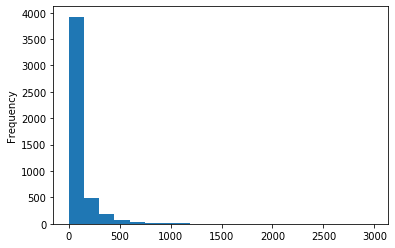

In [45]:
# distribution of # review per restaurant
df_final["business_id"].value_counts().plot.hist(bins = 20)

Save preprocessed data to csv

In [46]:
df_final.to_pickle('df_final.pkl')

## NLP preprocessing: tokenize, lemmitize, negation, cleaning, stop word removal

In [2]:
import pandas as pd
df = pd.read_pickle('df_final.pkl')

In [3]:
df['stars'].value_counts()

5.0    222689
4.0     84384
1.0     60251
3.0     43901
2.0     33542
Name: stars, dtype: int64

In [4]:
df['rating_isperfect'] = np.where(df['stars'] < 5, 0, 1).astype(int)
df['rating_isperfect'].value_counts()

1    222689
0    222078
Name: rating_isperfect, dtype: int64

In [5]:
reviewtext = df['text'].copy()

### Pre-load generic data cleaning module

In [3]:
#import nltk
#nltk.download('stopwords')

import string
import itertools 
import re
from nltk.stem import WordNetLemmatizer
from string import punctuation
from nltk.corpus import stopwords

stop_words = set(stopwords.words('English'))

punct = list(string.punctuation)

In [4]:
def nlp_func(text, lowercase = False, word_negation = False, remove_stopword = False, stemming = False, lemmatization = False):
    
    txt = str(text)

    # transform to lower case
    if lowercase:
        txt = txt.lower()
    
    # Replace apostrophes with standard lexicons
    txt = txt.replace("isn't", "is not")
    txt = txt.replace("aren't", "are not")
    txt = txt.replace("ain't", "am not")
    txt = txt.replace("won't", "will not")
    txt = txt.replace("didn't", "did not")
    txt = txt.replace("shan't", "shall not")
    txt = txt.replace("haven't", "have not")
    txt = txt.replace("hadn't", "had not")
    txt = txt.replace("hasn't", "has not")
    txt = txt.replace("don't", "do not")
    txt = txt.replace("wasn't", "was not")
    txt = txt.replace("weren't", "were not")
    txt = txt.replace("doesn't", "does not")
    txt = txt.replace("'s", " is")
    txt = txt.replace("'re", " are")
    txt = txt.replace("'m", " am")
    txt = txt.replace("'d", " would")
    txt = txt.replace("'ll", " will")
    
    # More cleaning
    txt = re.sub(r"what's", "what is", txt)
    txt = re.sub(r"\'s", " ", txt)
    txt = txt.replace(r"pic", "picture")
    txt = re.sub(r"\'ve", " have ", txt)
    txt = re.sub(r"can't", "cannot ", txt)
    txt = re.sub(r"n't", " not ", txt)
    txt = re.sub(r"i'm", "i am", txt)
    txt = re.sub(r" m ", " am ", txt)
    txt = re.sub(r"\'re", " are ", txt)
    txt = re.sub(r"\'d", " would ", txt)
    txt = re.sub(r"\'ll", " will ", txt)
    txt = re.sub(r"e-mail", "email", txt)
    txt = re.sub(r" dms ", "direct messages ", txt)  
    txt = re.sub(r"kms", " kilometers ", txt)
    #txt = re.sub(r"KMs", " kilometers ", txt)
    
    
    #txt = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)  # no need, will remove all punctuations

    #txt = re.sub(r",", " ", text)  # no need, will remove all punctuations
    #txt = re.sub(r"\.", " ", text)
    #txt = re.sub(r"!", " ! ", text)
    #txt = re.sub(r"\/", " ", text)
    #txt = re.sub(r"\^", " ^ ", text)
    #txt = re.sub(r"\+", " + ", text)
    #txt = re.sub(r"\-", " - ", text)
    #txt = re.sub(r"\=", " = ", text)
    #txt = re.sub(r"'", " ", text)
    #txt = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    #txt = re.sub(r":", " : ", text)
    txt = re.sub(r" e g ", " eg ", txt)
    txt = re.sub(r" b g ", " bg ", txt)
    txt = re.sub(r" u s ", " american ", txt)
    txt = re.sub(r"\0s", "0", txt)
    txt = re.sub(r" 9 11 ", "911", txt)
    txt = re.sub(r"j k", "jk", txt)
    txt = re.sub(r"\s{2,}", " ", txt)  # convert soooooo to soo
    
    
    # Emoji replacement
    txt = re.sub(r':\)',r' happy ',txt)
    txt = re.sub(r':D',r' happy ',txt)
    txt = re.sub(r':P',r' happy ',txt)
    txt = re.sub(r':\(',r' sad ',txt)
    
    # Remove urls and emails
    txt = re.sub(r'^https?:\/\/.*[\r\n]*', ' ', txt, flags=re.MULTILINE)
    txt = re.sub(r'[\w\.-]+@[\w\.-]+', ' ', txt, flags=re.MULTILINE)
    
    # Remove punctuation from text
    txt = ''.join([c for c in txt if c not in punctuation])
        
    # Remove all symbols
    txt = re.sub(r'[^A-Za-z0-9\s]',r' ',txt)
    txt = re.sub(r'\n',r' ',txt)
    
    txt = re.sub(r'[0-9]',r' ',txt)    # remove all numbers
    
    # Replace words like sooooooo with so
    txt = ''.join(''.join(s)[:2] for _, s in itertools.groupby(txt))
    

    
    if stemming:
        st = PorterStemmer()
        txt = " ".join([st.stem(w) for w in txt.split()])
    
    if lemmatization:
        wordnet_lemmatizer = WordNetLemmatizer()
        txt = " ".join([wordnet_lemmatizer.lemmatize(w, pos='v') for w in txt.split()]) #n for noun files, v for verb files, a for adjective files, r for adverb files.

    if word_negation:
        new_words = []
        temp_word = ''
        txt = txt.split()
        for word in txt:
            if word == 'not':
                temp_word = 'not_'
            elif temp_word == 'not_':
                word = temp_word + word
                temp_word = ''
            if word != 'not':
                new_words.append(word)
        txt = ' '.join(new_words)
        
    if remove_stopword:
        txt = " ".join([w for w in txt.split() if w not in stop_words])
    
    return txt

### Process text data using generic NLP module

In [7]:
reviewtext_nlp = reviewtext.map(lambda x: nlp_func(x, lowercase = True, word_negation = True, \
                                                remove_stopword = True, stemming = False, lemmatization = True))

In [8]:
reviewtext[:5]

0    I've ordered Caldo de Rez from here twice and ...
1    Always delicious I get the tampiquena or Chile...
2    Great lil mom/pop place.  It is small but it m...
3    This place is soo good. Huge portions. Great p...
4    Omg!!! This place is great my mother and I lov...
Name: text, dtype: object

In [9]:
reviewtext_nlp[:5]

0    order caldo de rez twice time food soo good cu...
1    always delicious get tampiquena chile verde al...
2    great lil mompop place small make feel comfy s...
3    place soo good huge portion great price friend...
4    omg place great mother love green enchiladas d...
Name: text, dtype: object

### Save the NLP processed data (Las Vegas, Last 2 Years)

In [11]:
reviewtext_nlp.to_pickle('reviewtext_nlp.pkl')  

## TD-IDF vectorization 

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer

# much faster, as no nee to lower case or stop words
tfidf_vectorizer = TfidfVectorizer(lowercase=False, stop_words = None, max_features=1000, use_idf=True, smooth_idf=True, norm='l2')

In [120]:
X = tfidf_vectorizer.fit_transform(reviewtext_nlp_top1res).toarray()

### get bag of words

In [121]:
words = tfidf_vectorizer.get_feature_names()
print(words[:100])

['able', 'absolute', 'absolutely', 'actually', 'add', 'additional', 'advertise', 'afternoon', 'ago', 'agree', 'ahead', 'alcohol', 'allow', 'almost', 'along', 'already', 'alright', 'also', 'although', 'always', 'amaze', 'ambiance', 'american', 'amount', 'another', 'anymore', 'anyone', 'anything', 'anyway', 'anywhere', 'appeal', 'appetite', 'appreciate', 'area', 'areas', 'aria', 'around', 'array', 'arrive', 'asian', 'ask', 'assortment', 'atmosphere', 'attention', 'attentive', 'authentic', 'available', 'average', 'avoid', 'away', 'awesome', 'awful', 'bacchanal', 'back', 'bacon', 'bad', 'bar', 'base', 'basically', 'basil', 'bbq', 'bean', 'beat', 'beautiful', 'beautifully', 'become', 'beef', 'beer', 'begin', 'behind', 'believe', 'bellagio', 'belly', 'benedict', 'besides', 'best', 'better', 'beverages', 'beyond', 'big', 'bigger', 'biggest', 'birthday', 'bisque', 'bite', 'bland', 'blow', 'boba', 'boil', 'bone', 'bottle', 'bottomless', 'bowl', 'boyfriend', 'br', 'bread', 'break', 'breakfast', 

# PART 1. Sentiment Analysis

* Goal: predict customer sentiment (rating 5 vs. 1-4) using review text and logistic regression

In [12]:
import pandas as pd
df = pd.read_pickle('df_final.pkl')
df.head(2)

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...",4.5,0,2017-03-27 21:03:02,0,lJfGtkCc4in6Xcq-_Wtfwg,3.0,I've ordered Caldo de Rez from here twice and ...,0,PFdPopcevMX7_2cx27rJKA
1,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...",4.5,0,2018-04-29 03:41:12,0,W4ZRHf1adPB3phMi2P1GqQ,5.0,Always delicious I get the tampiquena or Chile...,0,h4iPN4TWksMntu93CI_CMw


In [13]:
df['stars'].value_counts()

5.0    222689
4.0     84384
1.0     60251
3.0     43901
2.0     33542
Name: stars, dtype: int64

## Define target binary variable

In [14]:
df['rating_isperfect'] = np.where(df['stars'] < 5, 0, 1).astype(int)
df['rating_isperfect'].value_counts()

1    222689
0    222078
Name: rating_isperfect, dtype: int64

## Load the NLP processed review text data

In [15]:
reviewtext_nlp = pd.read_pickle('reviewtext_nlp.pkl')

## 50/50 Train-test split

In [16]:
from sklearn.model_selection import train_test_split
X_train0, X_test0, y_train, y_test = train_test_split(reviewtext_nlp, df['rating_isperfect'].values, test_size=0.5, random_state=33)

In [17]:
y_train.mean(), y_test.mean(), df['rating_isperfect'].mean()

(0.5011848927301098, 0.5001888625080941, 0.5006868764993806)

In [18]:
X_train0.shape, X_test0.shape

((222383,), (222384,))

### TF-IDF on training set

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

#tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words = 'english', max_features=1000, use_idf=True, smooth_idf=True, norm='l2')

# much faster, as no nee to lower case or stop words
tfidf_vectorizer = TfidfVectorizer(lowercase=False, stop_words = None, max_features=1000, use_idf=True, smooth_idf=True, norm='l2')

X_train = tfidf_vectorizer.fit_transform(X_train0).toarray()

In [20]:
words = tfidf_vectorizer.get_feature_names()
print(words[:200])

['able', 'absolutely', 'accommodate', 'across', 'actually', 'add', 'affordable', 'afternoon', 'ago', 'ahead', 'allow', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'amaze', 'ambiance', 'ambience', 'american', 'amount', 'annoy', 'another', 'answer', 'anyone', 'anything', 'anyway', 'anywhere', 'apologize', 'appetizer', 'appetizers', 'appreciate', 'area', 'around', 'arrive', 'asada', 'asian', 'ask', 'atmosphere', 'attention', 'attentive', 'attitude', 'authentic', 'available', 'average', 'avocado', 'avoid', 'away', 'awesome', 'awful', 'ayce', 'back', 'bacon', 'bad', 'bag', 'bake', 'ball', 'banana', 'bar', 'barely', 'bartender', 'bartenders', 'base', 'basic', 'basically', 'bathroom', 'bbq', 'bean', 'beat', 'beautiful', 'become', 'bed', 'beef', 'beer', 'beers', 'begin', 'behind', 'believe', 'bellagio', 'belly', 'benedict', 'best', 'better', 'beyond', 'big', 'bill', 'birthday', 'bite', 'black', 'bland', 'blow', 'blue', 'boba', 'bomb', 'bone', 'book', 'bottle', 'bowl', 

## Apply TD-IDF model to test set (transform only, not fit_transform)

In [21]:
# Use the trained model to transform the test data
X_test = tfidf_vectorizer.transform(X_test0).toarray()
X_test.shape

(222384, 1000)

## Standardize the X_train and X_test for modelling use

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Pre-load prediction performance evaluation modules

In [23]:
# Function block for metric scores
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

def get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred, threshold=0.5): #, table_name
    metric_names = ['ROC\'s AUC','Accuracy','Precision','Recall','F1-score']
    metric_values_train = [roc_auc_score(y_train, p_train_pred),
                    accuracy_score(y_train, p_train_pred>threshold),
                    precision_score(y_train, p_train_pred>threshold),
                    recall_score(y_train, p_train_pred>threshold),
                    f1_score(y_train, p_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, p_test_pred),
                    accuracy_score(y_test, p_test_pred>threshold),
                    precision_score(y_test, p_test_pred>threshold),
                    recall_score(y_test, p_test_pred>threshold),
                    f1_score(y_test, p_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'Metric':metric_names,
                                'Train':metric_values_train,
                                'Test':metric_values_test},columns=['Metric','Train','Test']).set_index('Metric')  
    #all_metrics.to_csv('output/table_' + str(table_name) + '.csv')
    print(all_metrics)  

# Function block for ROC plot
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred, roc_name):         #, plot_name
    
    roc_auc_train = roc_auc_score(y_train, p_train_pred)               # get the AUC Score using roc_auc_score
    fpr_train, tpr_train, _ = roc_curve(y_train, p_train_pred)         # get the vector of FPR and TPR ) using roc_curve

    roc_auc_test = roc_auc_score(y_test, p_test_pred)                  # get the AUC Score using roc_auc_score
    fpr_test, tpr_test, _ = roc_curve(y_test, p_test_pred)             # get the vector of FPR and TPR ) using roc_curve
    
    #plot ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate (1-Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('ROC Curve for ' + str(roc_name))
    plt.legend(loc="lower right")
    #plt.savefig('output/figure_' + str(plot_name) + '.jpg')
    plt.show()

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  roc_auc_score

ladder = np.exp(list(np.linspace(-7, 7, num= 10)))  #0.001~1100 equally spaced in logscale

param_lr = {'C':ladder, 'penalty':['l1','l2']}

lr_clf = LogisticRegression(max_iter=100)   #, solver = 'sag') 

lr_clf_gs = GridSearchCV(lr_clf, param_grid = param_lr, scoring='roc_auc', iid=False, cv=3, n_jobs=4)
lr_clf_gs.fit(X_train_scaled, y_train)

print('best estimator:', lr_clf_gs.best_estimator_, '\n',
      'best parameter:', lr_clf_gs.best_params_,'\n',
      'best ROC score:', lr_clf_gs.best_score_)

C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


best estimator: LogisticRegression(C=0.020468075714350484, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False) 
 best parameter: {'C': 0.020468075714350484, 'penalty': 'l1'} 
 best ROC score: 0.914081624536632


* Logistic regression with L1 and C=0.020468 is the best model

              Train      Test
Metric                       
ROC's AUC  0.916459  0.915508
Accuracy   0.839300  0.838262
Precision  0.827818  0.825123
Recall     0.857772  0.858622
F1-score   0.842529  0.841539


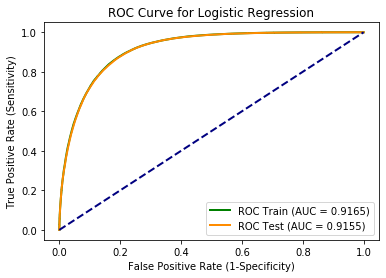

In [26]:
# refit entire training set using best hyperparameters
lr_clf_best = lr_clf_gs.best_estimator_
#lr_clf_best.fit(X_train_scaled, y_train) # no need to refit, gridsearchcv automatically refit entire set

y_train_pred = lr_clf_best.predict(X_train_scaled)
p_train_pred = lr_clf_best.predict_proba(X_train_scaled)[:,1]

y_test_pred = lr_clf_best.predict(X_test_scaled)
p_test_pred = lr_clf_best.predict_proba(X_test_scaled)[:,1]

get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred, roc_name = 'Logistic Regression')

* the model reaches very high predictive performance ! (test set ROC 0.916, accurary 0.838, F1 score 0.842)

In [27]:
df_coeffs = pd.DataFrame(list(zip(words, lr_clf_best.coef_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs.to_csv('part1_sentimentanalysis_logistic_reg_coeffs.csv')

### Top 20 words for positvie sentiments

In [28]:
df_coeffs[:20].reset_index().drop('index', axis=1)

,feature,coeff
0,amaze,0.438497
1,best,0.366317
2,great,0.272149
3,awesome,0.225733
4,delicious,0.224917
5,love,0.209728
6,excellent,0.184616
7,thank,0.154187
8,favorite,0.154036
9,fantastic,0.152534


### Top 20 words for negative sentiment

In [30]:
df_coeffs[-20:].sort_values(by='coeff').reset_index().drop('index', axis=1)

,feature,coeff
0,worst,-0.418672
1,horrible,-0.303859
2,rude,-0.267568
3,terrible,-0.261217
4,not_worth,-0.249701
5,ok,-0.236142
6,disgust,-0.225216
7,bland,-0.188152
8,okay,-0.181217
9,mediocre,-0.174748


## Part 1 Summary

* The sentiment analysis and prediction achieved high prediction accuracy for perfect user sentiment
* top positive and negative keywords are most important for sentement prediction

# PART 2: Recommend Restaurants using Review Text and NMF

## Load NLP processed data

In [17]:
import pandas as pd
df = pd.read_pickle('df_final.pkl')

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
n_review_restaurant = df.groupby('business_id').size().reset_index().rename({0:'n_review_restaurant'}, axis='columns').sort_values(by='n_review_restaurant', ascending=False)
n_review_restaurant.head(5)

,business_id,n_review_restaurant
2115,RESDUcs7fIiihp38-d6_6g,2986
3273,faPVqws-x-5k2CQKDNtHxw,2420
2064,QXV3L_QFGj8r6nWX2kS2hA,2320
389,4JNXUYY8wbaaDmk3BPzlWw,2088
4428,vHz2RLtfUMVRPFmd7VBEHA,2078


In [20]:
business_mostreivewed200 = n_review_restaurant['business_id'][:200] 

## Select top 200 restaurants with more reviews

In [21]:
df_mostreviewed200 = df.loc[df['business_id'].isin(business_mostreivewed200), ]
df_mostreviewed200.head(2)

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
1723,ujHiaprwCQ5ewziu0Vi9rw,The Buffet at Bellagio,"American (New), Buffets, Restaurants",3.5,0,2017-02-09 04:48:06,0,aYSR8tO4kBqk0f6_ZYM2Zw,2.0,Went for Saturday Brunch. Wait was doable comp...,0,3BBiuiNLFuA-0Z4RE2UoQA
1724,ujHiaprwCQ5ewziu0Vi9rw,The Buffet at Bellagio,"American (New), Buffets, Restaurants",3.5,0,2017-07-18 17:58:49,0,hZGN-ClXWcdGkdZHTOCbvg,4.0,One of the better Vegas Buffets. No wait at 10...,0,kSOPFO9QHjDKiEfmYtTOSg


In [22]:
df_mostreviewed200.shape, df_mostreviewed200['user_id'].nunique(),df_mostreviewed200['business_id'].nunique()

((140835, 12), 94529, 200)

* 140835 reviews from 94529 users for 200 restaurants

## Random sample 30000 users

In [23]:
import numpy as np

In [19]:
#user_id_30k = np.random.choice(a=df_mostreviewed200['user_id'].unique(), n = 30000, replace=False)
#user_id_30k.shape

In [24]:
user_id_30k = pd.DataFrame(df_mostreviewed200['user_id'].unique()).sample(n = 30000, replace=False, random_state = 40)
user_id_30k.shape

(30000, 1)

In [25]:
user_id_30k.head()

,0
43788,UkqX8DY2_fLdoQp66AxFCw
17181,iY5zak08RKdDz5gfEyGrZw
60420,-DlNrkkd5iUXwdfmSGx5ew
42961,B9FYcoM5Qp-_zjFDJoBx9g
86127,MPTKhGSNAcK5RDnUfkhjkQ


In [26]:
df_mostreviewed200_user30k = df_mostreviewed200.loc[df['user_id'].isin(user_id_30k[0]), ]

In [27]:
df_mostreviewed200_user30k.shape, df_mostreviewed200_user30k['user_id'].nunique(),df_mostreviewed200_user30k['business_id'].nunique()

((44725, 12), 30000, 200)

* 44725 reviews from 30000 users for 200 restaurants

In [28]:
df_mostreviewed200_user30k.head(2)

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
1732,ujHiaprwCQ5ewziu0Vi9rw,The Buffet at Bellagio,"American (New), Buffets, Restaurants",3.5,0,2017-08-16 14:35:48,0,lerO9Vz0Nybxog5uE9NKXQ,2.0,"I was here for dinner with my family, there's ...",0,H86i4SXs9jHZUh3pgZZ_Vg
1733,ujHiaprwCQ5ewziu0Vi9rw,The Buffet at Bellagio,"American (New), Buffets, Restaurants",3.5,0,2016-11-21 22:10:54,0,fg81UzYFoJzbYBrjG1KqJA,2.0,Not what I expected for the price. Its the Be...,0,GbzI5Rt_1eWjXF8d54Txcw


In [29]:
reviewtext_nlp = pd.read_pickle('reviewtext_nlp.pkl')

## Merge User ID and Processed Review Text

In [30]:
user_review_df = df_mostreviewed200_user30k[['user_id','text']].merge(reviewtext_nlp.to_frame(), left_index = True, right_index = True)

In [32]:
user_review_df.head(2)

,user_id,text_x,text_y
1732,H86i4SXs9jHZUh3pgZZ_Vg,"I was here for dinner with my family, there's ...",dinner family kid price disappoint kid barely ...
1733,GbzI5Rt_1eWjXF8d54Txcw,Not what I expected for the price. Its the Be...,not_what expect price bellagio name speak cold...


* confirm that merge by left index works

In [33]:
user_review_df = df_mostreviewed200_user30k[['user_id']].merge(reviewtext_nlp.to_frame(), left_index = True, right_index = True)
user_review_df.shape

(44725, 2)

In [34]:
user_review_df.head(2)

,user_id,text
1732,H86i4SXs9jHZUh3pgZZ_Vg,dinner family kid price disappoint kid barely ...
1733,GbzI5Rt_1eWjXF8d54Txcw,not_what expect price bellagio name speak cold...


## Merge Business ID and Processed Review Text

In [35]:
business_review_df = df_mostreviewed200_user30k[['business_id']].merge(reviewtext_nlp.to_frame(), left_index = True, right_index = True)
business_review_df.shape

(44725, 2)

In [36]:
business_review_df.head(2)

,business_id,text
1732,ujHiaprwCQ5ewziu0Vi9rw,dinner family kid price disappoint kid barely ...
1733,ujHiaprwCQ5ewziu0Vi9rw,not_what expect price bellagio name speak cold...


## Combine reviews from same user into 1 row

In [37]:
user_review_df_agg = user_review_df.groupby('user_id').agg({'text': ' '.join})
user_review_df_agg.head(2)

,text
user_id,
--OuPo_FoEnz41-whCm1hQ,love place great place good food highly recomm...
--PJ1FuEoTEo-3Cxf_izRg,great decor subpar foods not_have crab legs me...


## Combine reviews from same restaurant into 1 row

In [38]:
business_review_df_agg = business_review_df.groupby('business_id').agg({'text': ' '.join})
business_review_df_agg.head(2)

,text
business_id,
-ADtl9bLp8wNqYX1k3KuxA,black garlic miso good also add corn signature...
-ed0Yc9on37RoIoG2ZgxBA,pack flavor salty side thai food asia never sa...


## TF-IDF on user and business aggregated text data

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
user_tfidf_vectorizer = TfidfVectorizer(lowercase=False, stop_words = None, max_features=500, use_idf=True, smooth_idf=True, norm='l2')
user_review_agg_tfidf = user_tfidf_vectorizer.fit_transform(user_review_df_agg['text']).toarray()

In [41]:
user_review_agg_tfidf.shape

(30000, 500)

In [42]:
business_tfidf_vectorizer = TfidfVectorizer(lowercase=False, stop_words = None, max_features=500, use_idf=True, smooth_idf=True, norm='l2')

business_review_agg_tfidf = business_tfidf_vectorizer.fit_transform(business_review_df_agg['text']).toarray()

In [43]:
business_review_agg_tfidf.shape

(200, 500)

## Add the index and column name back to TF-IDF matrix, create P and Q matrices

In [27]:
P = pd.DataFrame(user_review_agg_tfidf, index=user_review_df_agg.index, columns=user_tfidf_vectorizer.get_feature_names())

Q = pd.DataFrame(business_review_agg_tfidf, index=business_review_df_agg.index, columns=business_tfidf_vectorizer.get_feature_names())

In [28]:
P.shape, Q.shape

((30000, 500), (200, 500))

In [29]:
P.head(2)

,able,absolutely,actually,add,almost,already,also,although,always,amaze,...,worth,would,wow,wrong,year,years,yelp,yes,yet,yummy
user_id,,,,,,,,,,,,,,,,,,,,,
--OuPo_FoEnz41-whCm1hQ,0.0,0.250599,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--PJ1FuEoTEo-3Cxf_izRg,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.323181,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
Q.head(2)

,able,absolutely,actually,add,almost,already,also,although,always,amaze,...,worth,would,wow,wrong,year,years,yelp,yes,yet,yummy
business_id,,,,,,,,,,,,,,,,,,,,,
-ADtl9bLp8wNqYX1k3KuxA,0.003379,0.003296,0.008790,0.015536,0.003329,0.003396,0.018585,0.002310,0.018585,0.028425,...,0.015306,0.044823,0.002310,0.004461,0.003552,0.001172,0.001149,0.005717,0.002264,0.005832
-ed0Yc9on37RoIoG2ZgxBA,0.009579,0.020023,0.008009,0.020223,0.002696,0.006877,0.045160,0.008418,0.054457,0.055786,...,0.031878,0.092976,0.002806,0.012194,0.002877,0.009969,0.044672,0.001389,0.005501,0.005668


## Create user-restaurant average score matrix
calculate average rating by user and restaurant, into a sparse matrix (208777 users, 4761 restaurants)

In [31]:
user_business_rating_matrix = pd.pivot_table(df_mostreviewed200_user30k, values='stars', index=['user_id'], columns=['business_id'])
user_business_rating_matrix.shape

(30000, 200)

In [32]:
user_business_rating_matrix.head(2)

business_id,-ADtl9bLp8wNqYX1k3KuxA,-ed0Yc9on37RoIoG2ZgxBA,-oUM2uISux96lMGeawHIOA,0EgYXYjt2XJL4hlsKnzrcw,0_aeYE2-VbsZts_UpILgDw,0d0i0FaJq1GIeW1rS2D-5w,2iTsRqUsPGRH1li1WVRvKQ,2sx52lDoiEtef7xgPCaoBw,2weQS-RnoOBhb1KsHKyoSQ,3BCsAgo_1i4xMuTyLKMLRQ,...,xVEtGucSRLk5pxxN0t4i6g,xfWdUmrz2ha3rcigyITV0g,xtYiHTmunjfCN2sUaQxBjA,y4ETe3DkcIjjr_eyeg5U5g,yfxDa8RFOvJPQh0rNtakHA,ygaOvp0PLBYaYeN9cZAlGg,ysv6yhVYOoH9Pf7PlMyD0g,z5J9U_HU4iVLwaCH6rdC2w,zRqi6L1u-YmmVAHjeUbGMQ,zaxK3ea92mvEBRy-jttngg
user_id,,,,,,,,,,,,,,,,,,,,,
--OuPo_FoEnz41-whCm1hQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--PJ1FuEoTEo-3Cxf_izRg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Save the main DF to local

In [33]:
user_business_rating_matrix.to_pickle('user_business_rating_matrix.pkl')
P.to_pickle('P.pkl')
Q.to_pickle('Q.pkl')

In [1]:
import pandas as pd
user_business_rating_matrix = pd.read_pickle('user_business_rating_matrix.pkl')
P = pd.read_pickle('P.pkl')
Q = pd.read_pickle('Q.pkl')

## Matrix factorization on Ratings and Review Texts Data
* decompose Rating matrix R into User_keyword matrix P and business_keyword matrix Q, i.e. R = P*Q, using matrix factorization and Stochastic Gradient Descent

In [2]:
# vectorize
import numpy as np
 
def func_mf(R, P, Q, K, steps, alpha=0.0002, beta=0.02):

    Q = Q.T
    
    E_step = np.zeros(steps)
    
    nrow_R = R.shape[0]
    ncol_R = R.shape[1]
    
    for step in range(steps):
        #print('step', step)
        for i in range(nrow_R):
            #print('1st', i)
            for j in range(ncol_R):
                #print('2nd', j)
                if R.iloc[i,j] > 0:
                    eij = R.iloc[i,j] - np.dot(P.iloc[i,:],Q.iloc[:,j])
                    #for k in range(K):
                    P.iloc[i,:] = P.iloc[i,:] + alpha * (2 * eij * Q.iloc[:,j] - beta * P.iloc[i,:])
                    Q.iloc[:,j] = Q.iloc[:,j] + alpha * (2 * eij * P.iloc[i,:] - beta * Q.iloc[:,j])
        
        #eR = np.dot(P,Q)

        e = 0

        for i in range(nrow_R):
            #print('3rd', i)
            for j in range(ncol_R):
                #print('4th', j)
                if R.iloc[i,j] > 0:
                    e = e + pow(R.iloc[i,j] - np.dot(P.iloc[i,:],Q.iloc[:,j]), 2) + \
                    (beta/2) * (pow(P.iloc[i,:],2).sum() + (pow(Q.iloc[:,j],2)).sum())
                    
                    #lamda*(pow(np.linalg.norm(P.loc[i]),2)+pow(np.linalg.norm(Q.loc[j]),2))
                    
                    #for k in range(K):
                    #e = e + (beta/2) * (pow(P.iloc[i,:],2).sum() + (pow(Q.iloc[:,j],2)).sum())
        
        print('step=',step, ', e=', e)   #, 'next_step_time=', datetime.datetime.now())
        
        E_step[step] = e

        if e < 0.1:
            print('break time=', datetime.datetime.now(), 'step=', step, 'e=',e)
            break
    return P, Q.T, E_step

In [3]:
import datetime
print(datetime.datetime.now())
P_mf, Q_mf, E_step = func_mf(R=user_business_rating_matrix, P=P, Q=Q, K=500, steps=400, alpha=0.0002, beta=0.02)
print(datetime.datetime.now())

2019-07-27 16:43:43.451961
step= 0 , e= 632034.3153125633
step= 1 , e= 610629.8403882812
step= 2 , e= 589693.7103254948
step= 3 , e= 569182.5366907803
step= 4 , e= 549075.9651110553
step= 5 , e= 529371.7496104998
step= 6 , e= 510081.2226208578
step= 7 , e= 491225.0955469545
step= 8 , e= 472829.61251812597
step= 9 , e= 454923.1314046991
step= 10 , e= 437533.22378623957
step= 11 , e= 420684.37365509267
step= 12 , e= 404396.320528493
step= 13 , e= 388683.04611503024
step= 14 , e= 373552.3553803066
step= 15 , e= 359005.96220024547
step= 16 , e= 345039.9632134251
step= 17 , e= 331645.57356441097
step= 18 , e= 318810.0038743499
step= 19 , e= 306517.37523043633
step= 20 , e= 294749.5932547539
step= 21 , e= 283487.1284789457
step= 22 , e= 272709.6744145566
step= 23 , e= 262396.674418216
step= 24 , e= 252527.7226788276
step= 25 , e= 243082.85350803117
step= 26 , e= 234042.737416722
step= 27 , e= 225388.8033580244
step= 28 , e= 217103.30518376594
step= 29 , e= 209169.34780990184
step= 30 , e= 20

step= 248 , e= 20099.22210265369
step= 249 , e= 20070.914884855083
step= 250 , e= 20042.817510781777
step= 251 , e= 20014.92697954251
step= 252 , e= 19987.240355477268
step= 253 , e= 19959.75476627491
step= 254 , e= 19932.467401152935
step= 255 , e= 19905.375509099547
step= 256 , e= 19878.476397177885
step= 257 , e= 19851.76742888668
step= 258 , e= 19825.24602257431
step= 259 , e= 19798.909649911067
step= 260 , e= 19772.755834407686
step= 261 , e= 19746.782149988427
step= 262 , e= 19720.986219605173
step= 263 , e= 19695.365713905885
step= 264 , e= 19669.918349937594
step= 265 , e= 19644.64188990112
step= 266 , e= 19619.53413993891
step= 267 , e= 19594.592948966507
step= 268 , e= 19569.816207540745
step= 269 , e= 19545.201846766387
step= 270 , e= 19520.747837233193
step= 271 , e= 19496.452187991283
step= 272 , e= 19472.312945557365
step= 273 , e= 19448.328192953228
step= 274 , e= 19424.4960487735
step= 275 , e= 19400.814666282255
step= 276 , e= 19377.282232542137
step= 277 , e= 19353.89

* take a long time to run. An interation is about 3 minutes.

## Save the converged matries to local

In [ ]:
P_mf.to_pickle('P_mf.pkl')
Q_mf.to_pickle('Q_mf.pkl')
pd.DataFrame(E_step).to_pickle('E_step.pkl')

In [5]:
P_mf = pd.read_pickle('P_mf.pkl')
Q_mf = pd.read_pickle('Q_mf.pkl')
E_step = pd.read_pickle('E_step.pkl')

## Check Stochastic Gradient Descent Convergence

Text(0.5, 1.0, 'Error Convergence with SGD')

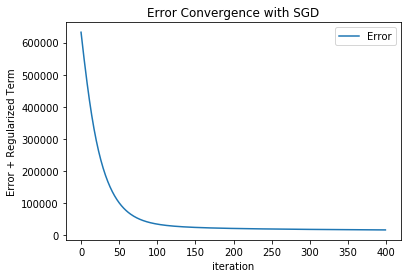

In [10]:
df_E_step = E_step.rename(columns={0:'Error'})
df_E_step.plot()
plt.xlabel('iteration')
plt.ylabel('Error + Regularized Term')
plt.title('Error Convergence with SGD')

* The Stochastic Gradient Descent converged after 400 iterations

## Restaurant Recommendation using Text

### input new text for prediction

In [79]:
sentence = "I love thai food a lot a lot!"

In [80]:
test_df = pd.DataFrame([sentence], columns=['text'])

In [81]:
test_df.values

array([['I love thai food a lot a lot!']], dtype=object)

In [82]:
test_df['text'] = test_df['text'].map(lambda x: nlp_func(x, lowercase = True, word_negation = True, \
                                                remove_stopword = True, stemming = False, lemmatization = True))

In [83]:
test_df.values

array([['love thai food lot lot']], dtype=object)

In [84]:
test_tfidf = user_tfidf_vectorizer.transform(test_df['text']).toarray()

In [85]:
test_tfidf.shape

(1, 500)

In [86]:
test_tfidf_df = pd.DataFrame(test_tfidf, index=test_df.index, columns=user_tfidf_vectorizer.get_feature_names())
test_tfidf_df

,able,absolutely,actually,add,almost,already,also,although,always,amaze,ambiance,amount,another,anyone,anything,appetizer,appetizers,area,around,arrive,ask,atmosphere,attentive,average,away,awesome,back,bacon,bad,bar,base,bbq,bean,beautiful,bed,beef,beer,belly,best,better,big,bill,birthday,bite,book,bowl,boyfriend,bread,breakfast,bring,broth,brunch,buffet,bun,burger,burgers,busy,butter,cake,call,cannot,care,casino,change,charge,check,cheese,chef,chicken,chip,chocolate,choice,choices,choose,clean,close,coffee,cold,come,cook,cool,corn,could,couple,course,crab,cream,crispy,crowd,customer,cut,day,days,deal,decent,decide,decor,definitely,delicious,desk,dessert,desserts,different,din,dinner,disappoint,dish,dog,door,drink,drive,dry,early,easy,eat,egg,either,else,end,enjoy,enough,entire,especially,even,ever,every,everyone,everything,excellent,excite,expect,expensive,experience,extra,extremely,family,fan,fantastic,far,fast,favorite,fee,feel,felt,fill,finally,find,fine,finish,first,fish,flavor,flavorful,floor,food,forget,free,french,fresh,friend,friendly,friends,front,fry,full,fun,garlic,get,give,glad,glass,go,good,gordon,great,green,greet,grill,group,guess,guy,half,hand,happen,happy,hard,hear,help,helpful,high,highly,hit,home,honestly,horrible,host,hot,hotel,hour,hours,house,however,huge,hungry,husband,ice,include,inside,instead,issue,items,keep,kid,kind,kitchen,know,lack,large,las,last,late,later,least,leave,less,let,light,like,line,list,literally,little,live,lobster,locate,location,lol,long,look,lot,loud,love,lunch,mac,main,make,manager,many,may,maybe,meal,mean,meat,meats,mention,menu,mexican,might,minutes,miss,mix,money,morning,mouth,move,much,mushroom,music,must,nachos,name,need,never,new,next,nice,night,noodle,noodles,not_a,not_be,not_even,not_get,not_have,not_know,not_like,not_sure,not_the,not_too,not_want,nothing,offer,oh,ok,okay,old,one,onion,open,options,order,outside,overall,oyster,pack,pancakes,park,part,party,pasta,pay,people,per,perfect,perfectly,person,pho,piece,pizza,place,plat,plate,play,please,plenty,plus,pm,point,pool,pork,portion,potato,potatoes,prepare,pretty,price,pricey,probably,put,quality,quick,quickly,quite,ramen,ready,real,really,reason,receive,recommend,red,refill,regular,reservation,reservations,resort,restaurant,restaurants,return,review,rib,rice,right,roll,room,rude,run,salad,salmon,salty,sandwich,sauce,saw,say,seafood,season,seat,second,see,seem,selection,serve,server,servers,service,set,several,shake,share,shop,short,show,shrimp,side,since,sit,size,slice,slow,small,smoke,soft,someone,something,soo,soon,soup,special,spend,spicturey,spot,staff,stand,star,start,station,stay,steak,still,stop,street,strip,stuff,style,super,sure,surprise,sushi,sweet,table,tacos,take,talk,taste,tasty,tea,tell,tender,thai,thank,thing,things,think,though,three,time,tip,toast,today,top,totally,town,trip,truffle,try,turn,twice,two,type,us,use,usually,variety,vegan,vegas,view,visit,waffle,wait,waiter,waitress,walk,want,warm,watch,water,way,week,weekend,well,white,whole,wife,wine,wing,wish,without,wonderful,work,worst,worth,would,wow,wrong,year,years,yelp,yes,yet,yummy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.185458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

### Make prediction
* predict rating = p x Q 
* choose top 10 restaurants

In [87]:
predict_item_rating=pd.DataFrame(np.dot(test_tfidf_df.loc[0], Q_mf.T), index=Q_mf.index, columns=['Rating'])
predict_item_rating[:5]

,Rating
business_id,
-ADtl9bLp8wNqYX1k3KuxA,0.444722
-ed0Yc9on37RoIoG2ZgxBA,2.175284
-oUM2uISux96lMGeawHIOA,0.451916
0EgYXYjt2XJL4hlsKnzrcw,0.652854
0_aeYE2-VbsZts_UpILgDw,0.715279


### give top 10 recommendation

In [97]:
top_recommendations = predict_item_rating.sort_values(by=['Rating'], ascending=[0])[:5]
top_recommendations

,Rating
business_id,
cyzOijFJ82cae6qH6L8vuw,2.328419
FNe5PPA9pyj8FjcDefCBpg,2.197946
-ed0Yc9on37RoIoG2ZgxBA,2.175284
N0CoaG3cBrTGm2ecLYSzqA,2.160811
w5CSi-An5meLnxjKSFn0wQ,2.049345


### check detailed business info

In [101]:
top_recommendations_df = top_recommendations.merge(df_business, how ='inner', left_index=True, right_on = 'business_id')
top_recommendations_df

,Rating,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
174226,2.328419,"953 E Sahara Ave, Ste E-14","{'RestaurantsTableService': 'True', 'Caters': ...",cyzOijFJ82cae6qH6L8vuw,"Food, Restaurants, Thai, Seafood, Desserts",Las Vegas,"{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...",1,36.142286,-115.142521,Arawan Thai Bistro and Dessert,89109,835,4.5,NV
122007,2.197946,"3839 W Sahara Ave, Ste 7-9","{'Ambience': '{'romantic': False, 'intimate': ...",FNe5PPA9pyj8FjcDefCBpg,"Food, Bars, Noodles, Beer Bar, Thai, Nightlife...",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ...",1,36.143956,-115.193089,Weera Thai,89102,900,4.5,NV
110619,2.175284,523 Fremont St,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...",-ed0Yc9on37RoIoG2ZgxBA,"Beer Gardens, Nightlife, Restaurants, Thai",Las Vegas,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-23:0'...",1,36.168802,-115.139880,Le Thai,89101,1638,4.0,NV
101320,2.160811,620 E Flamingo Rd,"{'GoodForDancing': 'False', 'RestaurantsGoodFo...",N0CoaG3cBrTGm2ecLYSzqA,"Restaurants, Thai, Bars, Seafood, Nightlife, W...",Las Vegas,"{'Monday': '17:30-22:0', 'Tuesday': '17:30-22:...",1,36.115154,-115.149706,Lotus of Siam,89119,649,4.5,NV
99932,2.049345,3137 S Industrial Rd,"{'Ambience': '{'romantic': False, 'intimate': ...",w5CSi-An5meLnxjKSFn0wQ,"Seafood, Asian Fusion, Restaurants, Thai",Las Vegas,"{'Monday': '11:0-4:0', 'Tuesday': '11:0-4:0', ...",1,36.132775,-115.172881,Thai St Cafe,89109,836,4.0,NV


In [100]:
top_recommendations_df['categories'].values

array(['Food, Restaurants, Thai, Seafood, Desserts',
       'Food, Bars, Noodles, Beer Bar, Thai, Nightlife, Food Delivery Services, Laotian, Restaurants, Wine Bars, Beer, Wine & Spirits, Vegetarian',
       'Beer Gardens, Nightlife, Restaurants, Thai',
       'Restaurants, Thai, Bars, Seafood, Nightlife, Wine Bars',
       'Seafood, Asian Fusion, Restaurants, Thai'], dtype=object)

* these top 5 recommendations are high rating and have thai food. Good! 

## Part 2 Summary

* The Lantent Factor Collaborative Filtering using Matrix Factorization on review ratings and texting achieved good recommendation outcome